# Preprocessing Template for Loan Prediction

Hello :) Nag-separate ako ng portions where you can change some variables and nag-comment ako sa parts na pwede kayo mag-experiment. 

After  niyo daanan yung steps dito, mags-save yung processed x_train , y_train, x_test, y_test sa csv files at current iteration files folder.

After that pwede na kayo magrun from MachineLearning.ipynb

### Don't forget to activate and deactivate your virtual environment! Pwede mag-crash laptop niyo because of this ehe

open cmd terminal sa VS Code

BEFORE STARTING:
`env\Scripts\activate.bat`


BEFORE CLOSING VS CODE:
`env\Scripts\deactivate.bat`


In [205]:
#imports 
import pandas as pd
import numpy as np
import re
import json
import seaborn as sns

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from scipy.optimize import minimize_scalar

Set dataset path

In [206]:
dataset_path = "./dataset/train.csv"

In [207]:
#import dataset
bank_loan_df = pd.read_csv(dataset_path)

dataset_original_rows = bank_loan_df.shape[0]

#change column names for easier manipulation
bank_loan_df.columns = bank_loan_df.columns.str.replace(' ', '_') 

#show columns
bank_loan_df.columns

Index(['Customer_ID', 'Name', 'Gender', 'Age', 'Income_(USD)',
       'Income_Stability', 'Profession', 'Type_of_Employment', 'Location',
       'Loan_Amount_Request_(USD)', 'Current_Loan_Expenses_(USD)',
       'Expense_Type_1', 'Expense_Type_2', 'Dependents', 'Credit_Score',
       'No._of_Defaults', 'Has_Active_Credit_Card', 'Property_ID',
       'Property_Age', 'Property_Type', 'Property_Location', 'Co-Applicant',
       'Property_Price', 'Loan_Sanction_Amount_(USD)'],
      dtype='object')

From the column names shown above, choose the unnecessary columns (list) and target column (string).

In [208]:
# does not make sense to predict based on these columns
unnecessary_columns = ['Customer_ID', 'Name'] #list

target_column = 'Loan_Sanction_Amount_(USD)' #string

In [209]:
dropped_rows = {"target column missing value": bank_loan_df[target_column].isna().sum()}
dropped_columns = dict()
bank_loan_df = bank_loan_df.dropna(subset=[target_column])

#drop duplicates
if bank_loan_df.duplicated().sum() != 0:
    dropped_rows.update({"duplicates": bank_loan_df.duplicated().sum()})
    bank_loan_df.drop_duplicates(inplace=True)

for column in unnecessary_columns:
    if "unnecessary" in dropped_columns:
        dropped_columns["unnecessary"] += [column]
    else:
        dropped_columns.update({"unnecessary": [column]})


bank_loan_df.drop(unnecessary_columns, axis=1, inplace=True)

bank_loan_df.reset_index(drop=True, inplace=True)

#print dataset info
print(bank_loan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29660 entries, 0 to 29659
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       29608 non-null  object 
 1   Age                          29660 non-null  int64  
 2   Income_(USD)                 25167 non-null  float64
 3   Income_Stability             28002 non-null  object 
 4   Profession                   29660 non-null  object 
 5   Type_of_Employment           22472 non-null  object 
 6   Location                     29660 non-null  object 
 7   Loan_Amount_Request_(USD)    29660 non-null  float64
 8   Current_Loan_Expenses_(USD)  29493 non-null  float64
 9   Expense_Type_1               29660 non-null  object 
 10  Expense_Type_2               29660 non-null  object 
 11  Dependents                   27214 non-null  float64
 12  Credit_Score                 27990 non-null  float64
 13  No._of_Defaults 

Make sure categorical variables above have Dtype of object and numerical variables have Dtype int64/int32/float64. If not:

In [210]:
# IN CASE lahat or maraming columns ang kailangan ibahin, run niyo muna ito para madaling ma-generate yung dictionary
# IF KONTI lang iibahin na Dtypes, dun na kayo sa next cell
placeholder = dict()

for column in bank_loan_df.columns:
    placeholder.update({column: str(bank_loan_df[column].dtype)})

placeholder

{'Gender': 'object',
 'Age': 'int64',
 'Income_(USD)': 'float64',
 'Income_Stability': 'object',
 'Profession': 'object',
 'Type_of_Employment': 'object',
 'Location': 'object',
 'Loan_Amount_Request_(USD)': 'float64',
 'Current_Loan_Expenses_(USD)': 'float64',
 'Expense_Type_1': 'object',
 'Expense_Type_2': 'object',
 'Dependents': 'float64',
 'Credit_Score': 'float64',
 'No._of_Defaults': 'int64',
 'Has_Active_Credit_Card': 'object',
 'Property_ID': 'int64',
 'Property_Age': 'float64',
 'Property_Type': 'int64',
 'Property_Location': 'object',
 'Co-Applicant': 'int64',
 'Property_Price': 'float64',
 'Loan_Sanction_Amount_(USD)': 'float64'}

In [211]:
# ibahin niyo yung dictionary item ng 'column':'datatype' if needed
placeholder = {'Gender': 'object',
                'Age': 'int64',
                'Income_(USD)': 'float64'}

bank_loan_df.astype(placeholder).dtypes

Gender                          object
Age                              int64
Income_(USD)                   float64
Income_Stability                object
Profession                      object
Type_of_Employment              object
Location                        object
Loan_Amount_Request_(USD)      float64
Current_Loan_Expenses_(USD)    float64
Expense_Type_1                  object
Expense_Type_2                  object
Dependents                     float64
Credit_Score                   float64
No._of_Defaults                  int64
Has_Active_Credit_Card          object
Property_ID                      int64
Property_Age                   float64
Property_Type                    int64
Property_Location               object
Co-Applicant                     int64
Property_Price                 float64
Loan_Sanction_Amount_(USD)     float64
dtype: object

Recheck Dtypes above.

Check unique values of categorical variables if they have impossible values (missing values/nan not included).

In [212]:
for column in bank_loan_df.columns:
    if bank_loan_df[column].dtype == "object":
        print(column)
        print(bank_loan_df[column].unique())
        print()

Gender
['F' 'M' nan]

Income_Stability
['Low' 'High' nan]

Profession
['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Type_of_Employment
['Sales staff' nan 'High skill tech staff' 'Secretaries' 'Laborers'
 'Managers' 'Cooking staff' 'Core staff' 'Drivers' 'Realty agents'
 'Security staff' 'Accountants' 'Private service staff'
 'Waiters/barmen staff' 'Medicine staff' 'Cleaning staff'
 'Low-skill Laborers' 'HR staff' 'IT staff']

Location
['Semi-Urban' 'Rural' 'Urban']

Expense_Type_1
['N' 'Y']

Expense_Type_2
['N' 'Y']

Has_Active_Credit_Card
[nan 'Unpossessed' 'Active' 'Inactive']

Property_Location
['Rural' 'Urban' 'Semi-Urban' nan]



Remove rows with impossible values (do not include missing values). You can run the next cell multiple times to remove more impossible values.

In [213]:
# change value for variable (ex. "Gender") and impossible_value (ex. "A")

column = "Gender"
impossible_value = "A"

removed = bank_loan_df[column][bank_loan_df[column] == impossible_value].count()

if removed != 0:

    if "impossible_value" in dropped_rows:  
        dropped_rows["impossible_value"] += removed

    else:
        dropped_rows.update({"impossible_value" : removed})
        
    bank_loan_df = bank_loan_df[bank_loan_df[column] != impossible_value]

Check for impossible values in the target column.

In [214]:
bank_loan_df[target_column].describe()

count     29660.000000
mean      47649.342208
std       48221.146686
min        -999.000000
25%           0.000000
50%       35209.395000
75%       74261.250000
max      481907.320000
Name: Loan_Sanction_Amount_(USD), dtype: float64

Change all negative y values to 0. (Decided as a team)

In [215]:
bank_loan_df.loc[bank_loan_df[target_column] < 0 , target_column] = 0

# uncommented this part in case kailangan natin sa future

# y_impossible_choices = ["remove all <= 0", "remove all < 0", "do nothing"]
# valid_input = False
# while valid_input == False:
#     string_choice = ""
#     removed=0
#     for i in range(len(y_impossible_choices)):
#         if y_impossible_choices[i] == "remove all <= 0":
#             removed = bank_loan_df[bank_loan_df[target_column] <= 0 ][target_column].count()
#         elif y_impossible_choices[i] == "remove all < 0":
#             removed = bank_loan_df[bank_loan_df[target_column] < 0 ][target_column].count()

#         string_choice += str(i) + ": " + y_impossible_choices[i] + " (will remove {} rows) | ".format(removed)

#     choice = input("What to do with y impossible values? " + string_choice + "Enter integer of choice. ")

#     try:
#         choice = int(choice)
#         if int(choice) in range(len(y_impossible_choices)):
#             y_impossible_choice = y_impossible_choices[choice]
#             valid_input = True
       
#     except:
#         print("Invalid input. Try again.")

# removed = 0
# if y_impossible_choice == "remove all <= 0":
#     removed = bank_loan_df[bank_loan_df[target_column] <= 0 ][target_column].count()
#     bank_loan_df = bank_loan_df[bank_loan_df[target_column] > 0 ]
# elif y_impossible_choice == "remove all < 0":
#     removed = bank_loan_df[bank_loan_df[target_column] < 0 ][target_column].count()
#     bank_loan_df = bank_loan_df[bank_loan_df[target_column] >= 0 ]

# if removed != 0:

#     if "impossible_value" in dropped_rows:
#         dropped_rows["impossible_value"] += removed
#     else:
#         dropped_rows.update({"impossible_value" : removed})
        
#     bank_loan_df = bank_loan_df[bank_loan_df[column] != impossible_value]

In [216]:
#applying one hot encoding to the data 
ohe_df = pd.get_dummies(bank_loan_df, dtype=int, dummy_na=True)

## Splitting dataset

In [217]:
x_df = ohe_df.drop([target_column], axis=1).reset_index(drop=True)
y_df = ohe_df[target_column].reset_index(drop=True)

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=17)

## Treating missing values
- Deletion

   Remove columns with null values and/or remove rows with null values.


- Replace

   For numerical: replace with column mean

   For categorical: replace with column mode or fill values with a new category


- Predict

   Using other columns pwede ipredict yung missing value kaso baka too complicated na so no need to explore this unless trip niyo talaga

<h4 style="color:yellow;"> Run code below and experiment with different choices for treating missing values! (Wag niyo lang muna gamitin yung predict) </h4>

In [218]:
missing_value_steps = dict()

for column in bank_loan_df.columns:

    if bank_loan_df[column].isna().sum() == 0:
        continue

    if bank_loan_df[column].dtype == "object": 

        options_object = ("delete_rows", "delete_column", "replace_mode", "replace_new", "predict_c")
        object_string = ""
        for i in range(len(options_object)):
            object_string = object_string + str(i) + " : " + options_object[i] + " | "
        
        valid_input = False

        while valid_input == False:

            choice = input("How do you want to process " + column + " with {} missing values ({:.2f}% of the dataset)? ".format(bank_loan_df[column].isna().sum(), bank_loan_df[column].isna().sum() / bank_loan_df.shape[0] * 100) + object_string+ "Input the integer of your choice. ")
            try:
                choice = int(choice)
                if choice in range(len(options_object)):
                    valid_input = True
            except:
                print("That is not a valid input. Choose again.")

        missing_value_steps.update({column:options_object[choice]})

    else: 
        
        options_numerical = ("delete_rows", "delete_column", "replace_mode", "replace_mean", "replace_median", "predict_r")

        numerical_string = ""

        for i in range(len(options_numerical)):
            numerical_string = numerical_string + str(i) + " : " + options_numerical[i] + " | "
        
        valid_input = False

        while valid_input == False:

            choice = input("How do you want to process " + column + " with {} missing values ({:.2f}% of the dataset)? ".format(bank_loan_df[column].isna().sum(), bank_loan_df[column].isna().sum() / bank_loan_df.shape[0] * 100) + numerical_string+ "Input the integer of your choice. ")


            try:
                choice = int(choice)
                if choice in range(len(options_numerical)):
                    valid_input = True
            except:
                print("That is not a valid input. Choose again.")

        missing_value_steps.update({column:options_numerical[choice]})
    

Uncomment model you want to use for prediction.

In [219]:
# For predictions, uncomment model you want to use
# regression models
model_r = 0

# classification models
model_c = 0

In [220]:
print("Starting train set size: " + str(x_train.shape))
print("Starting test set size: " + str(x_test.shape))
print("Starting total rows: " + str(x_train.shape[0] + x_test.shape[0]))
print("Starting test size %: " + str(x_test.shape[0] / (x_train.shape[0] + x_test.shape[0])))

for column in bank_loan_df.columns:
    if bank_loan_df[column].isna().sum() == 0:
        continue
    
    print("\n\nTreating missing values in column " + str(column))

    step = missing_value_steps[str(column)]
    
    if step == "delete_rows":

        if bank_loan_df[column].dtype == "object":

            column_name = str(column) + "_nan"
            removed = x_train[column_name].sum() + x_test[column_name].sum()
            print("Removed " + str(removed) + " rows from training and testing sets.")
            dropped_rows.update({column + " missing values": removed})

            x_train = x_train[x_train[column_name] != 1]   
            x_test = x_test[x_test[column_name] != 1]

            #need to remove another column to avoid redundancy
            pattern = re.compile('^' + column + '.*')
            matched = [ column for column in x_train.columns if pattern.match(column) ]
            x_train.drop(matched[0], axis=1, inplace=True)
            x_test.drop(matched[0], axis=1, inplace=True)
        
        else:

            removed = x_train[column].isna().sum() + x_test[column].isna().sum()
            print("Removed " + str(removed) + " rows from training and testing sets.")

            dropped_rows.update({column + " missing values": removed })
            x_train = x_train.dropna(subset=[str(column)])
            x_test = x_test.dropna(subset=[str(column)])

        print("Remaining rows: " + str(x_train.shape[0] + x_test.shape[0]))

    elif step == "delete_column":

        print("Removed " + column)
        dropped_columns.update({"missing values":column})

        if bank_loan_df[column].dtype == "object":          
            columns_to_drop = [str(column) + "_" + str(category) for category in bank_loan_df[str(column)].unique()]
            x_train.drop(columns_to_drop, axis=1, inplace=True)
            x_test.drop(columns_to_drop, axis=1, inplace=True)  
        else:
            x_train.drop([column], axis=1, inplace=True)
            x_test.drop([column], axis=1, inplace=True) 

    elif step == "replace_mean":
        print("Replaced missing values with mean.")
        if bank_loan_df[column].dtype in ["int64", "int32"] :
            x_train[str(column)].fillna(int(x_train[str(column)].mean()), inplace=True)
            x_test[str(column)].fillna(int(x_train[str(column)].mean()), inplace=True)
        else:
            x_train[str(column)].fillna(x_train[str(column)].mean(), inplace=True)
            x_test[str(column)].fillna(x_train[str(column)].mean(), inplace=True)
    
    elif step == "replace_median":
        print("Replaced missing values with median.")
        if bank_loan_df[column].dtype in ["int64", "int32"] :
            x_train[str(column)].fillna(int(x_train[str(column)].median()), inplace=True)
            x_test[str(column)].fillna(int(x_train[str(column)].median()), inplace=True)
        else:
            x_train[str(column)].fillna(x_train[str(column)].median(), inplace=True)
            x_test[str(column)].fillna(x_train[str(column)].median(), inplace=True)   


    elif step == "replace_mode":

        print("Replaced missing values with mode.")
        if bank_loan_df[column].dtype != "object" :
            x_train[str(column)].fillna(int(x_train[str(column)].median()), inplace=True)
            x_test[str(column)].fillna(int(x_train[str(column)].median()), inplace=True)
        
        else:
            mode = bank_loan_df[str(column)].mode()[0]
            column_nan = str(column) + "_nan"
            column_mode = str(column) + "_" + str(mode)
            x_train.loc[x_train[column_nan] == 1, column_mode] = 1
            x_test.loc[x_test[column_nan] == 1, column_mode] = 1
    
            #need to remove another column to avoid redundancy
            pattern = re.compile('^' + column + '.*')
            matched = [ column for column in x_train.columns if pattern.match(column) ]
            x_train.drop(matched[0], axis=1, inplace=True)
            x_test.drop(matched[0], axis=1, inplace=True)
        
    elif step == "replace_new":
        print("Replaced missing values with new category.")
        
    elif step == "predict_r":
        pass

    elif step == "predict_c":
        pass

#remove redundant columns
pattern = re.compile('.*_nan$')
matched = [ column for column in x_train.columns if pattern.match(column) ]
x_train.drop(matched, axis=1, inplace=True)
x_test.drop(matched, axis=1, inplace=True)

print("\n\nEnd train set size: " + str(x_train.shape))
print("End test set size: " + str(x_test.shape))
print("End total rows: " + str(x_train.shape[0] + x_test.shape[0]))
print("End test size %: " + str(x_test.shape[0] / (x_train.shape[0] + x_test.shape[0])))


Starting train set size: (23728, 64)
Starting test set size: (5932, 64)
Starting total rows: 29660
Starting test size %: 0.2


Treating missing values in column Gender
Replaced missing values with mode.


Treating missing values in column Income_(USD)
Replaced missing values with mode.


Treating missing values in column Income_Stability
Replaced missing values with mode.


Treating missing values in column Type_of_Employment
Replaced missing values with mode.


Treating missing values in column Current_Loan_Expenses_(USD)
Replaced missing values with median.


Treating missing values in column Dependents
Replaced missing values with median.


Treating missing values in column Credit_Score
Replaced missing values with median.


Treating missing values in column Has_Active_Credit_Card
Replaced missing values with mode.


Treating missing values in column Property_Age
Replaced missing values with mode.


Treating missing values in column Property_Location
Replaced missing values with mod

There should be no more missing values

In [221]:
print("Number of missing values: " + str(x_train.isna().sum().sum() + x_test.isna().sum().sum()))

Number of missing values: 0


## Handling Numerical Data


#### Remove impossible values

`describe()` can help visualize impossible values

In [222]:
numerical_columns = [column for column in bank_loan_df.columns if ((bank_loan_df[column].dtype!="object") & (column != target_column) & (column in x_train.columns))]
x_train[numerical_columns].describe()

,Age,Income_(USD),Loan_Amount_Request_(USD),Current_Loan_Expenses_(USD),Dependents,Credit_Score,No._of_Defaults,Property_ID,Property_Age,Property_Type,Co-Applicant,Property_Price
count,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,2.372800e+04
mean,40.089430,2506.776586,88775.633842,401.125574,2.234196,739.602162,0.191630,501.726273,2504.157718,2.458446,-4.415416,1.317201e+05
std,16.054789,1624.286549,59381.656541,241.580509,0.911371,70.142690,0.393592,288.441072,1617.335006,1.119885,72.381484,9.348812e+04
min,18.000000,377.700000,6108.050000,-999.000000,1.000000,580.000000,0.000000,1.000000,377.700000,1.000000,-999.000000,-9.990000e+02
25%,25.000000,1737.777500,41171.175000,249.380000,2.000000,684.905000,0.000000,251.000000,1743.837500,1.000000,1.000000,6.067098e+04
50%,40.000000,2217.000000,75156.510000,374.520000,2.000000,739.740000,0.000000,504.000000,2219.000000,2.000000,1.000000,1.099066e+05
75%,55.000000,2861.245000,119900.687500,520.330000,3.000000,794.750000,0.000000,751.000000,2845.017500,3.000000,1.000000,1.785751e+05
max,65.000000,122966.280000,621497.820000,3840.880000,10.000000,896.260000,1.000000,999.000000,122966.280000,4.000000,1.000000,1.077967e+06


<h4 style="color:yellow;"> Run cell to remove or transform rows with impossible values. 

May -999 values sa ibang columns</h4>

In [223]:
impossible_options = ["remove", "replace with 0", "none"]

# ----------------------------------------------------------------------------

# test removal removal
test1 = x_train.copy()
test2 = x_test.copy()

initial_rows = test1.shape[0] + test2.shape[0]

test1 = test1[(test1["Current_Loan_Expenses_(USD)"] >= 0) &
                (test1["Co-Applicant"] >= 0) & 
                (test1["Property_Price"] >= 0)]

test2 = test2[(test2["Current_Loan_Expenses_(USD)"] >= 0) &
                (test2["Co-Applicant"] >= 0) & 
                (test2["Property_Price"] >= 0)]

final_rows = test1.shape[0] + test2.shape[0]

removed = initial_rows - final_rows
percentage = removed / initial_rows * 100

# ----------------------------------------------------------------------------

impossible_string = ""
for i in range(len(impossible_options)):
    if impossible_options[i] == "remove":
        impossible_string = impossible_string + str(i) + " : " + impossible_options[i] + " (results in " + "{} rows removed or a {:.2f}".format(removed, percentage) +"% data removal) | "
    else:
        impossible_string = impossible_string + str(i) + " : " + impossible_options[i] + " | "

valid_input = False
while valid_input == False:

    choice = input("What will you do with impossible values? " + impossible_string + "Input the integer of your choice. ")

    try:
        choice = int(choice)
        if choice in range(len(impossible_options)):
            valid_input = True
    except:
        print("That is not a valid input. Choose again.")

impossible_choice = impossible_options[choice]

# ----------------------------------------------------------------------------

if impossible_choice == "remove":
    x_train = test1
    x_test = test2
    print("Removed {} rows with outliers, resulting in a {}% training set data loss".format(removed, percentage))

elif impossible_choice == "replace with 0":
    removed = 0
    columns_with_impossible_values = ["Current_Loan_Expenses_(USD)", "Co-Applicant", "Property_Price"]
    for column in columns_with_impossible_values:
        
        x_train.loc[x_train[column] < 0 , column] = 0
        x_test.loc[x_test[column] < 0 , column] = 0
        
    print("Transformed rows with impossible values")


elif impossible_choice =="none":
    removed =0

if removed != 0:

    if "impossible values" in dropped_rows:
        dropped_rows["impossible values"] += removed
    else:
        dropped_rows.update({"impossible values" : removed})

Removed 665 rows with outliers, resulting in a 2.2420768712070127% training set data loss


#### Correlations

Removing 1 or more highly correlated x variable (leave one of the correlated variables) may improve model performance.

<Axes: >

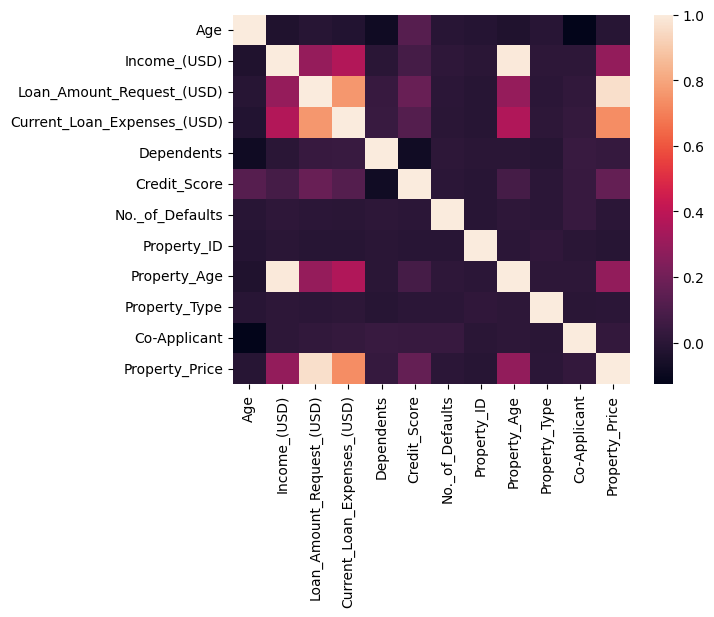

In [224]:
sns.heatmap(x_train[numerical_columns].corr())

In [225]:
correlations = x_train[numerical_columns].corr().abs()

unstacked = correlations.unstack()
sorted = unstacked.sort_values(kind="quicksort")

print("Pairs of variables with high correlations:")
sorted[(sorted>0.7) & (sorted < 1)]

Pairs of variables with high correlations:


Current_Loan_Expenses_(USD)  Property_Price                 0.732951
Property_Price               Current_Loan_Expenses_(USD)    0.732951
Loan_Amount_Request_(USD)    Current_Loan_Expenses_(USD)    0.760381
Current_Loan_Expenses_(USD)  Loan_Amount_Request_(USD)      0.760381
Property_Price               Loan_Amount_Request_(USD)      0.964122
Loan_Amount_Request_(USD)    Property_Price                 0.964122
Property_Age                 Income_(USD)                   0.995435
Income_(USD)                 Property_Age                   0.995435
dtype: float64

<h4 style="color:yellow;">Set columns to drop before running cell below</h4>

In [226]:
# leave at least one highly correlated variable
corr_columns_to_drop = ["Property_Price", "Current_Loan_Expenses_(USD)"]

for column in corr_columns_to_drop:
    if "correlation" in dropped_columns:
        dropped_columns["correlation"] += [column]
    else:
        dropped_columns.update({"correlation": [column]})


x_train.drop(corr_columns_to_drop, axis=1, inplace=True)
x_test.drop(corr_columns_to_drop, axis=1, inplace=True)

for column in corr_columns_to_drop:
    numerical_columns.remove(column)

#### Handling skewed data

Decreasing skewness may improve model performance.

FYI kung di kayo nagtransform ng skewed data, mas malaki yung chance na maraming matatanggal na rows if tatanggalin yung outliers

In [227]:
print("Initial skewness of data:")
x_train[numerical_columns].skew()

Initial skewness of data:


Age                           0.045277
Income_(USD)                 22.052402
Loan_Amount_Request_(USD)     1.264525
Dependents                    0.845588
Credit_Score                 -0.019934
No._of_Defaults               1.565174
Property_ID                  -0.005350
Property_Age                 22.317217
Property_Type                 0.053331
Co-Applicant                 -1.967923
dtype: float64

In [228]:
x_train[numerical_columns].describe()

,Age,Income_(USD),Loan_Amount_Request_(USD),Dependents,Credit_Score,No._of_Defaults,Property_ID,Property_Age,Property_Type,Co-Applicant
count,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000
mean,40.103991,2507.162946,88844.349625,2.234399,739.771491,0.191863,501.591493,2504.314316,2.458412,0.850672
std,16.062574,1632.409417,59383.462059,0.912122,70.140069,0.393775,288.439424,1625.457558,1.119789,0.356419
min,18.000000,377.700000,6108.050000,1.000000,580.850000,0.000000,1.000000,377.700000,1.000000,0.000000
25%,25.000000,1735.790000,41256.720000,2.000000,685.007500,0.000000,251.000000,1742.165000,1.000000,1.000000
50%,40.000000,2217.000000,75181.505000,2.000000,739.740000,0.000000,503.000000,2219.000000,2.000000,1.000000
75%,55.000000,2864.015000,119890.857500,3.000000,794.960000,0.000000,751.000000,2847.052500,3.000000,1.000000
max,65.000000,122966.280000,621497.820000,10.000000,896.260000,1.000000,999.000000,122966.280000,4.000000,1.000000


<h4 style="color:yellow;">Run cell below and choose how to process skewed data</h4>

In [229]:
positive_skew_options = {"sqrt":np.sqrt, "cbrt":np.cbrt, "log":np.log1p, "none":lambda x : x}
negative_skew_options = {'sq': np.square, 'cb': lambda x : x**3, "none": lambda x : x}

# ----------------------------------------------------------------------------

positive_skew_string = ""
for i in range(len(positive_skew_options)):
    positive_skew_string = positive_skew_string + str(i) + " : " + list(positive_skew_options.keys())[i] + " | "

valid_input = False
while valid_input == False:

    choice = input("Choose your transformation for positive skew: " + positive_skew_string + "Input the integer of your choice. ")

    try:
        choice = int(choice)
        if choice in range(len(positive_skew_options)):
            valid_input = True
    except:
        print("That is not a valid input. Choose again.")

positive_skew_choice = list(positive_skew_options)[choice]

# ----------------------------------------------------------------------------

negative_skew_string = ""
for i in range(len(negative_skew_options.keys())):
    negative_skew_string = negative_skew_string + str(i) + " : " + list(negative_skew_options.keys())[i] + " | "

valid_input = False
while valid_input == False:

    choice = input("Choose your transformation for negative skew: " + negative_skew_string + "Input the integer of your choice. ")

    try:
        choice = int(choice)
        if choice in range(len(negative_skew_options.keys())):
            valid_input = True
    except:
        print("That is not a valid input. Choose again.")

negative_skew_choice = list(negative_skew_options.keys())[choice]

# ----------------------------------------------------------------------------
skews = list(x_train[numerical_columns].skew())
for i in range(len(numerical_columns)):
    skew = skews[i]
    if skew >= 1:
        x_train[numerical_columns[i]] = x_train[numerical_columns[i]].apply(positive_skew_options[positive_skew_choice])
        x_test[numerical_columns[i]] = x_test[numerical_columns[i]].apply(positive_skew_options[positive_skew_choice])
    elif skew <= -1:
        x_train[numerical_columns[i]] = x_train[numerical_columns[i]].apply(negative_skew_options[negative_skew_choice])
        x_test[numerical_columns[i]] = x_test[numerical_columns[i]].apply(negative_skew_options[negative_skew_choice])

x_train[numerical_columns].skew()

Age                          0.045277
Income_(USD)                 2.435916
Loan_Amount_Request_(USD)    0.463853
Dependents                   0.845588
Credit_Score                -0.019934
No._of_Defaults              1.565174
Property_ID                 -0.005350
Property_Age                 2.460342
Property_Type                0.053331
Co-Applicant                -1.967923
dtype: float64

In [230]:
numerical_columns

['Age',
 'Income_(USD)',
 'Loan_Amount_Request_(USD)',
 'Dependents',
 'Credit_Score',
 'No._of_Defaults',
 'Property_ID',
 'Property_Age',
 'Property_Type',
 'Co-Applicant']

#### Handling Outliers

Note: numerical variables with Interquartile Range (iqr) = 0, will not be considered for outlier removal


<h4 style="color:yellow;">Run cell below and choose how you want to treat outliers</h4>

In [231]:
outlier_options = ["remove", "remove_limit_percent","none"]

# ----------------------------------------------------------------------------

# test outlier removal
test = x_train.copy()
initial_rows = test.shape[0] 
for column in numerical_columns:
    q1 = np.percentile(x_train[column], 25)
    q3 = np.percentile(x_train[column], 75)
    iqr = q3-q1
    if iqr == 0:
        continue
    upper = q3 +1.5*iqr
    lower = q1 -1.5*iqr
    test = test[(test[column] <= upper) & (test[column] >= lower)]
    
final_rows = test.shape[0] 
removed = initial_rows - final_rows
percentage = removed/initial_rows * 100

# ----------------------------------------------------------------------------

outlier_string = ""
for i in range(len(outlier_options)):
    if outlier_options[i] == "remove":
        outlier_string = outlier_string + str(i) + " : " + outlier_options[i] + " (results in " + "{:.2f}".format(percentage) +"% training data removal) | "
    else:
        outlier_string = outlier_string + str(i) + " : " + outlier_options[i] + " | "

valid_input = False
while valid_input == False:

    choice = input("What will you do with outliers? " + outlier_string + "Input the integer of your choice. ")

    try:
        choice = int(choice)
        if choice in range(len(outlier_options)):
            valid_input = True
    except:
        print("That is not a valid input. Choose again.")

outlier_choice = outlier_options[choice]

# ----------------------------------------------------------------------------

if outlier_choice == "remove":
    x_train = test
    print("Removed {} rows with outliers, resulting in a {}% training set data loss".format(removed, percentage))

elif outlier_choice == "remove_limit_percent":

    valid_input = False
    while valid_input == False:
        max_percent = input("Set the maximum percentage loss of data (range between 0.1 to {:.2f}): ".format(percentage))
        try:
            max_percent = float(max_percent)
            if (max_percent <= percentage) & (max_percent >= 0.1):
                valid_input = True
        except:
            print("Invalid input.")
    
    def function_to_minimize(x):
        test = x_train.copy()
        initial_rows = test.shape[0] 

        for column in numerical_columns:
            q1 = np.percentile(x_train[column], 25)
            q3 = np.percentile(x_train[column], 75)
            iqr = q3-q1
            if iqr == 0:
                continue
            upper = q3 +x*iqr
            lower = q1 -x*iqr
            test = test[(test[column] <= upper) & (test[column] >= lower)]
    
        final_rows = test.shape[0] 
        removed = initial_rows - final_rows
        percentage = removed/initial_rows * 100
        return abs(max_percent - percentage)
    
    result = minimize_scalar(function_to_minimize)

    test = x_train.copy()
    initial_rows = test.shape[0] 

    for column in numerical_columns:
        q1 = np.percentile(x_train[column], 25)
        q3 = np.percentile(x_train[column], 75)
        iqr = q3-q1
        if iqr == 0:
            continue
        upper = q3 +result.x*iqr
        lower = q1 -result.x*iqr
        test = test[(test[column] <= upper) & (test[column] >= lower)]

    final_rows = test.shape[0] 
    removed = initial_rows - final_rows
    percentage = removed/initial_rows * 100

    x_train = test
    print("Removed {} rows with outliers, resulting in a {:.2f}% training set data loss".format(removed, percentage))


elif outlier_choice =="none":
    removed =0

if removed != 0:

    if "outlier" in dropped_rows:
        dropped_rows["outlier"] += removed
    else:
        dropped_rows.update({"outlier" : removed})


Removed 1422 rows with outliers, resulting in a 6.12825374935356% training set data loss


#### Scaling

Making sure numerical values are generally close in values across columns to avoid bias.

<h4 style="color:yellow;">Run cell below and choose how to scale data</h4>

In [232]:
scaler_options = [StandardScaler(), MaxAbsScaler(), MinMaxScaler(), RobustScaler()]
scaler_string = ""
for i in range(len(scaler_options)):
    scaler_string = scaler_string + str(i) + " : " + str(scaler_options[i]) + " | "

valid_input = False
while valid_input == False:

    choice = input("Choose your scaler. " + scaler_string + "Input the integer of your choice. ")

    try:
        choice = int(choice)
        if choice in range(len(scaler_options)):
            valid_input = True
    except:
        print("That is not a valid input. Choose again.")

scaler = scaler_options[choice]

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns= x_train.columns, index=x_train.index)
x_test = pd.DataFrame(scaler.transform(x_test), columns= x_train.columns, index = x_test.index)

x_train.head()

,Age,Income_(USD),Loan_Amount_Request_(USD),Dependents,Credit_Score,No._of_Defaults,Property_ID,Property_Age,Property_Type,Co-Applicant,...,Location_Semi-Urban,Location_Urban,Expense_Type_1_N,Expense_Type_1_Y,Expense_Type_2_N,Expense_Type_2_Y,Has_Active_Credit_Card_Inactive,Has_Active_Credit_Card_Unpossessed,Property_Location_Semi-Urban,Property_Location_Urban
7682,-1.380175,-1.811779,-0.219795,0.958425,-1.273899,-0.486158,1.036573,-1.821788,0.486836,0.418320,...,-1.645855,-0.317352,0.729458,-0.729458,1.437865,-1.437865,-0.678534,-0.671689,-0.748094,-0.666368
11796,1.043722,-0.732811,-0.706293,0.958425,0.252019,-0.486158,-0.661939,-0.737420,1.380278,0.418320,...,0.607587,-0.317352,0.729458,-0.729458,-0.695476,0.695476,1.473765,-0.671689,-0.748094,-0.666368
16627,-1.318024,-1.115430,0.455036,-0.226725,0.513100,2.056946,-0.648074,-1.121954,-0.406606,-2.390512,...,0.607587,-0.317352,0.729458,-0.729458,1.437865,-1.437865,-0.678534,-0.671689,-0.748094,1.500672
12900,1.105873,-0.162790,2.351729,2.143575,0.299708,-0.486158,-0.620343,-0.164547,0.486836,0.418320,...,0.607587,-0.317352,0.729458,-0.729458,-0.695476,0.695476,-0.678534,1.488785,1.336730,-0.666368
6421,-0.075000,-0.357035,-0.679588,-0.226725,-1.027623,-0.486158,-1.043238,-0.359763,-1.300048,0.418320,...,0.607587,-0.317352,0.729458,-0.729458,1.437865,-1.437865,-0.678534,-0.671689,-0.748094,1.500672


## Summary

In [233]:
train_data = pd.concat([x_train,y_train], axis=1, join="inner").reset_index(drop=True)
test_data = pd.concat([x_test,y_test], axis=1, join="inner").reset_index(drop=True)

y_train = train_data[target_column]
x_train = train_data.drop([target_column], axis=1)
y_test = test_data[target_column]
x_test = test_data.drop([target_column], axis=1)

y_train.to_csv("./current_iteration_files/y_train.csv")
x_train.to_csv("./current_iteration_files/x_train.csv")
y_test.to_csv("./current_iteration_files/y_test.csv")
x_test.to_csv("./current_iteration_files/x_test.csv")

print("Total removed rows: {} | Removed {:.2f}% of original dataset.".format(dataset_original_rows - x_train.shape[0] - x_test.shape[0], (dataset_original_rows - x_train.shape[0] - x_test.shape[0]) / dataset_original_rows * 100 ))


Total removed rows: 2427 | Removed 8.09% of original dataset.


In [234]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)


In [235]:
print("Summary of removed columns:")
print(json.dumps(dropped_columns, cls=NpEncoder, indent=5))
print()
print("Summary of removed rows:")
print(json.dumps(dropped_rows, cls=NpEncoder, indent=5))


Summary of removed columns:
{
     "unnecessary": [
          "Customer_ID",
          "Name"
     ],
     "correlation": [
          "Property_Price",
          "Current_Loan_Expenses_(USD)"
     ]
}

Summary of removed rows:
{
     "target column missing value": 340,
     "impossible values": 665,
     "outlier": 1422
}


In [236]:

preprocessing_steps = {"dataset path":dataset_path, "target column":target_column, "dropped columns":dropped_columns, "missing values": missing_value_steps, 'skewness': {"positive":positive_skew_choice, "negative":negative_skew_choice}, "outliers":outlier_choice, "scaler": str(scaler)}

print(json.dumps(preprocessing_steps, indent=5, cls=NpEncoder))

with open("./current_iteration_files/preprocessing.json", "w") as outfile: 
    json.dump(preprocessing_steps, outfile)

{
     "dataset path": "./dataset/train.csv",
     "target column": "Loan_Sanction_Amount_(USD)",
     "dropped columns": {
          "unnecessary": [
               "Customer_ID",
               "Name"
          ],
          "correlation": [
               "Property_Price",
               "Current_Loan_Expenses_(USD)"
          ]
     },
     "missing values": {
          "Gender": "replace_mode",
          "Income_(USD)": "replace_mode",
          "Income_Stability": "replace_mode",
          "Type_of_Employment": "replace_mode",
          "Current_Loan_Expenses_(USD)": "replace_median",
          "Dependents": "replace_median",
          "Credit_Score": "replace_median",
          "Has_Active_Credit_Card": "replace_mode",
          "Property_Age": "replace_mode",
          "Property_Location": "replace_mode"
     },
     "skewness": {
          "positive": "sqrt",
          "negative": "sq"
     },
     "outliers": "remove",
     "scaler": "StandardScaler()"
}
